Step 1: Preprocess the Data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,2016,NaN,NaN,NaN
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,2016,NaN,NaN,NaN
2,3,angry,ভেজাল নির্বাচন ।,2016,NaN,NaN,NaN
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2016,NaN,NaN,NaN
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",2016,NaN,NaN,NaN


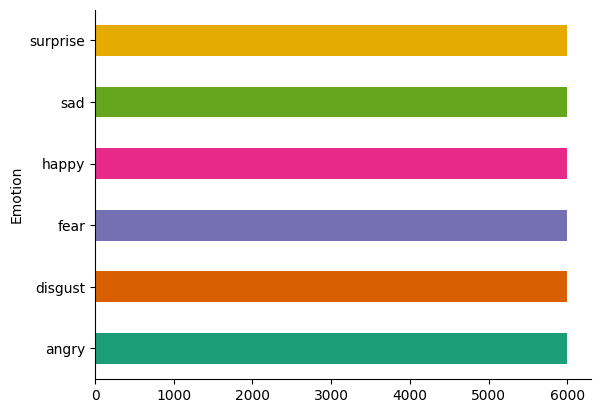

In [4]:
# @title Emotion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Emotion_label'] = le.fit_transform(df['Emotion'])


In [7]:
#drop Racial biases
df.drop(['Racial Biases'], axis=1, inplace=True)
#drop Hatred Percentage
df.drop(['Hatred Percentage',], axis=1, inplace=True)
#drop Depression Percentage
df.drop(['Depression Percentage'], axis=1, inplace=True)
#drop year
df.drop(['Year'], axis=1, inplace=True)


In [8]:
#data preprocessing using spacy

#removing unnecessary punctuation
import re

# Data cleaning function
def process_comments(Comment):
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

df['Cleaned'] = df['Text'].apply(process_comments)
df.head()


,SL,Emotion,Text,Emotion_label,Cleaned
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...


In [9]:
import pandas as pd

# Load Bengali stop words from a CSV file
stop_words_df = pd.read_csv('stopwords_bangla.csv')  # Assuming the CSV has one column with stop words
stop_words_df=stop_words_df.drop(['Unnamed: 0'], axis=1)
# Convert the stop words to a list
stop_words_list = stop_words_df.iloc[:, 0].tolist()  # Convert the column to a list

# Check the stop words list
print("Stop words list:", stop_words_list[:10])  # Print first 10 stop words for verification


# Function to remove stop words
def remove_stop_words(text, stop_words):
    if isinstance(text, str):  # Ensure the text is a string
        # Tokenize text (simple split for Bengali)
        words = text.split()
        # Filter out stop words
        filtered_words = [word for word in words if word not in stop_words]
        # Join words back into a single string
        return ' '.join(filtered_words)
    else:
        return text  # If text is not a string, return it as is

# Assuming 'df' is the DataFrame and 'Cleaned' is the column with text data
# Check a few entries in the original DataFrame
print("Original texts:", df['Cleaned'].head())

# Apply the function to the DataFrame
df['filtered_text'] = df['Cleaned'].apply(lambda x: remove_stop_words(x, stop_words_list))


df.head()

Stop words list: ['অই', 'অগত্যা', 'অত: পর', 'অতএব', 'অথচ', 'অথবা', 'অধিক', 'অধীনে', 'অধ্যায়', 'অনুগ্রহ']
Original texts: 0    নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1    জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2                                     ভেজাল নির্বাচন  
3    বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4    সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল  এ...
Name: Cleaned, dtype: object


,SL,Emotion,Text,Emotion_label,Cleaned,filtered_text
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভোট ব...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,জনগণ মনের আনন্দে ভোট কাস্ট দেশদ্রোহী পেট্রল বো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,বিএনপি রাজাকার সমর্থকরা হেরে দেশের আমিও সন্তুষ...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...,সূক্ষ্ম কারচুপি এতদিন একটা কথার কথা বাস্তব রূপ...


In [10]:
X = df['filtered_text']

In [11]:
y = df['Emotion_label']

In [12]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from gensim.models import Word2Vec

# Train Word2Vec model on the training data
word2vec_model = Word2Vec(sentences=x_train, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert text to Word2Vec embeddings
def text_to_embedding(text, model, max_length):
    embedding = []
    for word in text:
        if word in model.wv:
            embedding.append(model.wv[word])
        else:
            embedding.append([0] * model.vector_size)
    if len(embedding) < max_length:
        embedding.extend([[0] * model.vector_size] * (max_length - len(embedding)))
    return embedding[:max_length]

# Set the maximum sequence length
max_sequence_length = 100

# Convert texts to embeddings
x_train_emb = np.array([text_to_embedding(text, word2vec_model, max_sequence_length) for text in x_train])
x_test_emb = np.array([text_to_embedding(text, word2vec_model, max_sequence_length) for text in x_test])


##simple RNN

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.layers import Masking

# Define the RNN model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))
model.add(SimpleRNN(units=128))
model.add(Dense(units= 6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=20, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking (Masking)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          29,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,086 (117.52 KB)

 Trainable params: 30,086 (117.52 KB)

 Non-trainable params: 0 (0.00 B)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 [==============================] - 2s 9ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.62      0.58      0.60      1226
           1       0.72      0.71      0.72      1188
           2       0.78      0.77      0.77      1129
           3       0.65      0.65      0.65      1246
           4       0.48      0.49      0.48      1244
           5       0.73      0.77      0.75      1167

    accuracy                           0.66      7200
   macro avg       0.66      0.66      0.66      7200
weighted avg       0.66      0.66      0.66      7200



##RNN(LSTM)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Masking, Bidirectional

# Define the BiLSTM model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))
model.add(Bidirectional(LSTM(units=128, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 100, 100)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               233472    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 235014 (918.02 KB)
Trainable params: 235014 (918.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
720/720 [==============================] - 53s 69ms/step - loss: 1.8428 - accuracy: 0.2503 - val_loss: 1.7152 - val_accuracy: 0.2743
Epoch 2/10
720/720 [==============================] - 49s 68ms/step 

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 [==============================] - 6s 23ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1226
           1       0.59      0.72      0.65      1188
           2       0.68      0.71      0.69      1129
           3       0.62      0.58      0.60      1246
           4       0.45      0.33      0.38      1244
           5       0.63      0.70      0.66      1167

    accuracy                           0.59      7200
   macro avg       0.58      0.59      0.59      7200
weighted avg       0.58      0.59      0.58      7200



#CNN

In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Masking

# Define the CNN model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))  # Assuming input_shape remains the same

# Add convolutional layer
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))

# Add max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add fully connected (Dense) layer
model.add(Dense(units=128, activation='relu'))

# Output layer
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=40, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_1 (Masking)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 100, 128)            │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 884,230 (3.37 MB)

 Trainable params: 884,230 (3.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3573 - loss: 1.6034 - val_accuracy: 0.6375 - val_loss: 1.0487
Epoch 2/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7430 - loss: 0.7716 - val_accuracy: 0.7540 - val_loss: 0.8005
Epoch 3/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8633 - loss: 0.4355 - val_accuracy: 0.7797 - val_loss: 0.7726
Epoch 4/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9141 - loss: 0.2970 - val_accuracy: 0.8040 - val_loss: 0.7264
Epoch 5/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9375 - loss: 0.2245 - val_accuracy: 0.8170 - val_loss: 0.7479
Epoch 6/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9510 - loss: 0.1822 - val_accuracy: 0.8137 - val_loss: 0.8110
Epoch 7/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9542 - loss: 0.1581 - val_accuracy: 0.8215 - val_loss: 0.7997
Epoch 8/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9575 - loss: 0.1387 - val_accuracy: 0.

In [15]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1226
           1       0.83      0.88      0.86      1188
           2       0.90      0.88      0.89      1129
           3       0.84      0.80      0.82      1246
           4       0.74      0.69      0.72      1244
           5       0.82      0.92      0.87      1167

    accuracy                           0.82      7200
   macro avg       0.82      0.83      0.82      7200
weighted avg       0.82      0.82      0.82      7200



#CNN+BiLSTM

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Embedding, Masking, Bidirectional, LSTM

# Define the CNN-BiLSTM model
model = Sequential()

# Masking layer to handle padding
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))

# Convolutional layers
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=128, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))

# Output layer
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_5 (Masking)         (None, 100, 100)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 100, 128)          64128     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 50, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 50, 128)           82048     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 25, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_2 (Bidirecti  (None, 256)              

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 [==============================] - 2s 9ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1226
           1       0.83      0.84      0.84      1188
           2       0.88      0.88      0.88      1129
           3       0.83      0.84      0.83      1246
           4       0.70      0.70      0.70      1244
           5       0.83      0.89      0.86      1167

    accuracy                           0.82      7200
   macro avg       0.82      0.82      0.82      7200
weighted avg       0.82      0.82      0.82      7200



##BGRU

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Masking, Bidirectional

# Define the BGRU model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))
model.add(Bidirectional(GRU(units=128, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=80, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking (Masking)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         175,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,646 (690.02 KB)

 Trainable params: 176,646 (690.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.2240 - loss: 2.2250 - val_accuracy: 0.2559 - val_loss: 1.7361
Epoch 2/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.2916 - loss: 1.7127 - val_accuracy: 0.2910 - val_loss: 1.7086
Epoch 3/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.3119 - loss: 1.6860 - val_accuracy: 0.3085 - val_loss: 1.6867
Epoch 4/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.3340 - loss: 1.6546 - val_accuracy: 0.3342 - val_loss: 1.6571
Epoch 5/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.3684 - loss: 1.6039 - val_accuracy: 0.3675 - val_loss: 1.6218
Epoch 6/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.3978 - loss: 1.5617 - val_accuracy: 0.3887 - val_loss: 1.5909
Epoch 7/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.4223 - loss: 1.5216 - val_accuracy: 0.4064 - val_loss: 1.5719
Epoch 8/80
720/720 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.4486 - loss: 1.4780 - 

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1226
           1       0.73      0.79      0.76      1188
           2       0.75      0.84      0.79      1129
           3       0.78      0.69      0.73      1246
           4       0.64      0.42      0.51      1244
           5       0.74      0.84      0.79      1167

    accuracy                           0.71      7200
   macro avg       0.71      0.72      0.71      7200
weighted avg       0.71      0.71      0.71      7200



##CNN+BGRU

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Masking, Bidirectional, Dropout

# Define the CNN + BGRU model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))

# CNN Layer
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# BGRU Layer
model.add(Bidirectional(GRU(units=128, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))

# Fully Connected Layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=40, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'conv1d_1' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_4 (Masking)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 100, 64)             │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 256)                 │         147,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,558 (717.02 KB)

 Trainable params: 183,558 (717.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.1857 - loss: 2.2496 - val_accuracy: 0.2708 - val_loss: 1.7392
Epoch 2/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.2711 - loss: 1.7223 - val_accuracy: 0.3363 - val_loss: 1.6355
Epoch 3/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.3414 - loss: 1.6239 - val_accuracy: 0.3974 - val_loss: 1.5534
Epoch 4/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.4074 - loss: 1.5161 - val_accuracy: 0.4389 - val_loss: 1.4459
Epoch 5/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4461 - loss: 1.4192 - val_accuracy: 0.4701 - val_loss: 1.3792
Epoch 6/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.4983 - loss: 1.3175 - val_accuracy: 0.5194 - val_loss: 1.2766
Epoch 7/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.5386 - loss: 1.2252 - val_accuracy: 0.5488 - val_loss: 1.2052
Epoch 8/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.5817 - loss: 1.1358 - 

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1226
           1       0.74      0.80      0.77      1188
           2       0.80      0.84      0.82      1129
           3       0.85      0.71      0.77      1246
           4       0.55      0.52      0.54      1244
           5       0.82      0.82      0.82      1167

    accuracy                           0.73      7200
   macro avg       0.74      0.74      0.73      7200
weighted avg       0.73      0.73      0.73      7200



cnn+bgru+bilstm

In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, LSTM, Dense, Masking, Bidirectional, Dropout

# Define the CNN + BiLSTM + BGRU + BiLSTM model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))

# CNN Layer
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# First BiLSTM Layer (before BGRU)
model.add(Bidirectional(LSTM(units=64, return_sequences=True, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform')))

# BGRU Layer
model.add(Bidirectional(GRU(units=128, return_sequences=True, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))

# Second BiLSTM Layer (after BGRU)
model.add(Bidirectional(LSTM(units=64, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform')))

# Fully Connected Layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=40, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'conv1d_12' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_12 (Masking)                 │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 100, 64)             │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_12 (MaxPooling1D)      │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_22 (Bidirectional)     │ (None, 50, 128)             │          65,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_23 (Bidirectional)     │ (None, 50, 256)             │         196,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_24 (Bidirectional)     │ (None, 128)                 │         163,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 453,894 (1.73 MB)

 Trainable params: 453,894 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.2006 - loss: 3.2164 - val_accuracy: 0.2882 - val_loss: 1.7098
Epoch 2/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.3276 - loss: 1.6543 - val_accuracy: 0.3941 - val_loss: 1.5391
Epoch 3/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.4292 - loss: 1.4859 - val_accuracy: 0.4573 - val_loss: 1.4058
Epoch 4/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.5085 - loss: 1.3142 - val_accuracy: 0.5252 - val_loss: 1.2780
Epoch 5/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.5806 - loss: 1.1637 - val_accuracy: 0.5757 - val_loss: 1.1676
Epoch 6/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.6456 - loss: 1.0252 - val_accuracy: 0.6316 - val_loss: 1.0699
Epoch 7/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.6946 - loss: 0.8912 - val_accuracy: 0.6566 - val_loss: 1.0092
Epoch 8/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.7496 - loss: 0.7544 - 

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming x_data and y_data are your features and labels respectively
# x_data = ...
# y_data = ...

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred = rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
